# Importing libraries

In [1]:
# for data manipulation
import pandas as pd
import numpy as np
# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# for Classification algorithms
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Loading dataset

In [2]:
df=pd.read_csv("/Users/Anusuya/Downloads/Loan Prediction.csv")

# making a copy dataset
tst=df

#### peek of first 5 rows of dataset

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Cleaning,Transformation and Visualization

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here, two columns "LoanAmount" and "Loan_Amount_Term" are numerical data which can be imputed with their respective mean. "Credit_History" is also numerical, but taking its mean would not make sense. Rest of the columns are categorical types, and imputing them with their respective mode wouldn't make sense.

<AxesSubplot:>

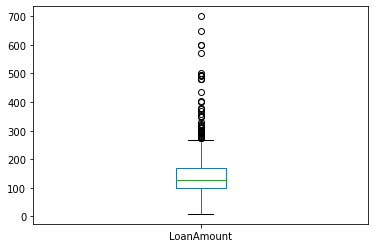

In [7]:
df["LoanAmount"].plot.box()  #checking for outliers

<AxesSubplot:>

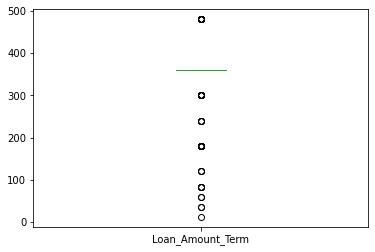

In [8]:
df["Loan_Amount_Term"].plot.box() #checking for outliers

removing outliers from copied dataset, then taking its mean for imputation

In [9]:
tst.loc[tst.LoanAmount >280, "LoanAmount"]=280  #converting all values >280 to 280
y = tst["LoanAmount"].mean()  #taking mean

In [10]:
#converting all loan terms >450 to 400 and <300 to 300
tst.loc[tst.Loan_Amount_Term>450, "Loan_Amount_Term"] =400
tst.loc[tst.Loan_Amount_Term<300, "Loan_Amount_Term"] =300

z=tst["Loan_Amount_Term"].mean()

In [11]:
df["LoanAmount"].fillna(y,inplace=True)  #replacing null values in LoanAmount with calculated mean
df["Loan_Amount_Term"].fillna(z,inplace=True)   #replacing null values in Loan_Amount_Term with calculated mean

In [12]:
df.dropna(inplace=True)  #dropping rest of the rows with null values

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
#store for later
df_id = df["Loan_ID"]

# since Loan_Status is independent of Loan_ID, dropping the columns
df = df.drop(["Loan_ID"],axis=1)

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,138.920608,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,511.000000,511.000000,511.00000,511.000000,511.000000
mean,5308.146771,1561.997886,138.29059,353.863796,0.843444
std,5561.209487,2559.383166,58.31093,20.428527,0.363738
min,150.000000,0.000000,9.00000,300.000000,0.000000
25%,2885.500000,0.000000,100.00000,360.000000,1.000000
50%,3858.000000,1086.000000,129.00000,360.000000,1.000000
75%,5820.000000,2253.500000,165.50000,360.000000,1.000000
max,81000.000000,33837.000000,280.00000,400.000000,1.000000


#### Loan Status vs Gender

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

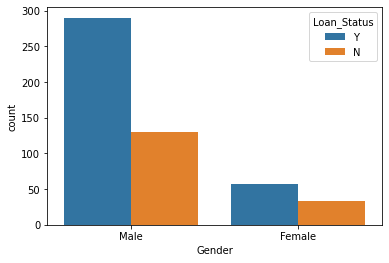

In [17]:
sns.countplot(df["Gender"], hue=df["Loan_Status"])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

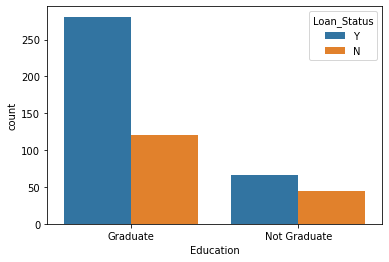

In [18]:
sns.countplot(df["Education"], hue=df["Loan_Status"])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

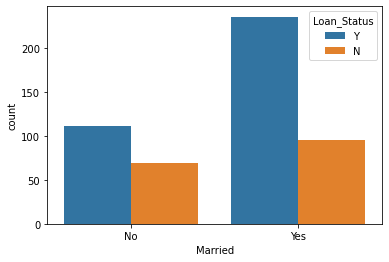

In [19]:
sns.countplot(df["Married"], hue=df["Loan_Status"])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

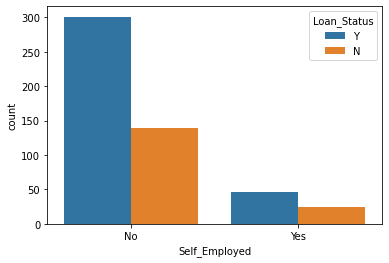

In [20]:
sns.countplot(df["Self_Employed"], hue=df["Loan_Status"])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

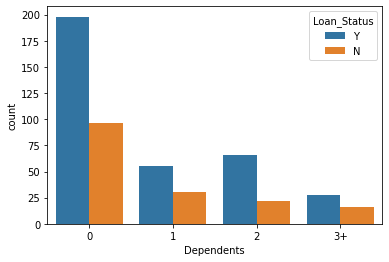

In [21]:
sns.countplot(df["Dependents"], hue=df["Loan_Status"])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

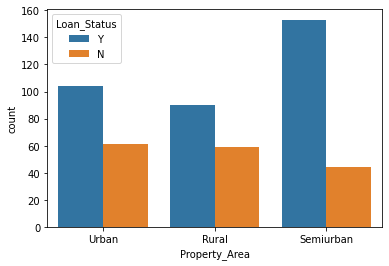

In [22]:
sns.countplot(df["Property_Area"], hue=df["Loan_Status"])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

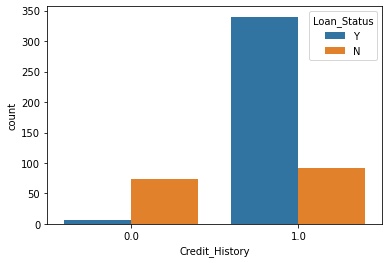

In [23]:
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])

for performing logistic regression, all the variable has to be of numerical datatype as ML model cannot comprehend object datatype.

In [24]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [25]:
df.replace({"Dependents":{"0":0, "1":1, "2":2, "3+":3}, "Property_Area":{"Rural":0, "Semiurban":1, "Urban":2}}, inplace=True)

In [26]:
df['Gender']=pd.get_dummies(df['Gender'])
df['Married']=pd.get_dummies(df['Married'])
df['Education']=pd.get_dummies(df['Education'])
df['Self_Employed']=pd.get_dummies(df['Self_Employed'])

In [27]:
df.shape

(511, 12)

In [28]:
x=df.drop(['Loan_Status'],axis=1) #axis=1 since we are dropping column
y=df['Loan_Status']

#### train-test splitting

In [29]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=101)

In [30]:
model=LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [31]:
lr_prediction = model.predict(x_test)

In [32]:
print("Logistic Regression accuracy = ", metrics.accuracy_score(lr_prediction, y_test))

Logistic Regression accuracy =  0.796875


In [33]:
print(lr_prediction)

['Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y']


The accuracy is 79.68%